## Assignment 1a: Machine Learning Methods

### \<Christian Ataiza> \<a1882443>

#### How can we use data analytics to predict energy usage for this house?

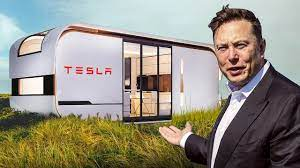

#### Follow detail instructions in the assignment specification and use these heading for implementation and discussion

# 1. Read the dataset

In [42]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
# set seed for reproducibility
import random
random.seed(113)

## Loading in the dataset

In [44]:
# loading in the dataset
# visualize the entire table including all columns
pd.set_option('display.max_columns', None)
df = pd.read_csv(r'energydata_complete.csv') 
df['date'] = pd.to_datetime(df.date, format = "%d/%m/%Y %H:%M")


In [45]:
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.60,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.48,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.37,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.25,733.8,92.0,6.000000,51.500000,5.0,45.410390,45.410390
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.13,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [46]:
# view the feature names
columns = df.columns
columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [47]:
# view the size of the dataframe
df.shape

(19735, 29)

## Check for Missing Data

In [48]:
df.isna().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

It can be seen that there is no need to impute for missing data since the dataset has no missing data.

# 2. Analyse and visualise the data

## Exploratory Data Analysis

### Data Dictionary

| Data variables                        | Feature Name in Table | Units           |
|----------------------------------------|-----------------------|-----------------|
| Datetime stamp | dd-mm-yy hh:ss | date                   |
| Appliances energy consumption          | appliances            | Wh              |
| Light energy consumption               | light                 | Wh              |
| T1, Temperature in kitchen area        | T1                    | °C              |
| RH1, Humidity in kitchen area          | RH_1                  | %               |
| T2, Temperature in living room area    | T2                    | °C              |
| RH2, Humidity in living room area      | RH_2                  | %               |
| T3, Temperature in laundry room area   | T3                    | °C              |
| RH3, Humidity in laundry room area     | RH_3                  | %               |
| T4, Temperature in office room         | T4                    | °C              |
| RH4, Humidity in office room           | RH_4                  | %               |
| T5, Temperature in bathroom            | T5                    | °C              |
| RH5, Humidity in bathroom              | RH_5                  | %               |
| T6, Temperature outside the building (north side) | T6      | °C              |
| RH6, Humidity outside the building (north side)   | RH_6    | %               |
| T7, Temperature in ironing room        | T7                    | °C              |
| RH7, Humidity in ironing room          | RH_7                  | %               |
| T8, Temperature in teenager room 2     | T8                    | °C              |
| RH8, Humidity in teenager room 2       | RH_8                  | %               |
| T9, Temperature in parents room        | T9                    | °C              |
| RH9, Humidity in parents room          | RH_9                  | %               |
| To, Temperature outside (from Chièvres weather station) | T_out | °C              |
| Pressure (from Chièvres weather station) | Press_mm_hg         | mm Hg           |
| RHo, Humidity outside (from Chièvres weather station) | RH_out   | %           |
| Windspeed (from Chièvres weather station) | Windspeed           | m/s             |
| Visibility (from Chièvres weather station) | Visbility           | km              |
| Tdewpoint (from Chièvres weather station) | Tdewpoint           | °C              |
| Random Variable 1 (RV 1)               | rv1                   | Non-dimensional |
| Random Variable 2 (RV 2)               | rv2                   | Non-dimensional |


In the paper (Candenado, et al., 2017) of the reading, `rv1` and `rv2` are variables made to introduce random noise for the purposes of Feature Selection using the Bortua packer for Feature Selection. These variables will be dropped.

In [49]:
df.drop(['rv1','rv2'], axis = 1, inplace = True)

### Identify the data types of each variable

In [50]:
df.dtypes

date           datetime64[ns]
Appliances              int64
lights                  int64
T1                    float64
RH_1                  float64
T2                    float64
RH_2                  float64
T3                    float64
RH_3                  float64
T4                    float64
RH_4                  float64
T5                    float64
RH_5                  float64
T6                    float64
RH_6                  float64
T7                    float64
RH_7                  float64
T8                    float64
RH_8                  float64
T9                    float64
RH_9                  float64
T_out                 float64
Press_mm_hg           float64
RH_out                float64
Windspeed             float64
Visibility            float64
Tdewpoint             float64
dtype: object

It can be observed that in the dictionary and in the data types that the values of each variable is continuous. 

### Feature Engineering

The paper also derived features from the dataset the proved to be insightful at predicting the features.


These were:
| Data variables                        | Feature Name in Table | Units           |
|----------------------------------------|-----------------------|-----------------|
| Number of seconds after midnight for each day | nsm | seconds                   |
| Week status         | W_status            | Weekend, Weekday              |
| Day of the week               | Dy_week_               | Mon, Tue, Wed, Thurs, Fri, Sat, Sun              |


However, the last two features derived were categorical which entails that [one-hot encoding](https://machinelearningmastery.com/why-one-hot-encode-data-in-machine-learning/)[2] is needed to be used to make the data suitable for a machine learning model.  

In [51]:
# Calculating for the derived fields

# NSM
df['nsm'] = ((df['date'] - df['date'].dt.normalize()) / pd.Timedelta('1 second')).astype(int)

# Day of the week
day = {0: 'mon', 1: 'tues', 2: 'wed', 3: 'thurs', 4: 'fri', 5: 'sat', 6: 'sun'}
df['Dy_week'] = df['date'].apply(lambda x : day[x.weekday()])

# Week status
df['W_status'] = df['Dy_week'].apply(lambda x: 'weekday' if x not in ('sat', 'sun') else 'weekend')

# set date as index 
df.set_index("date",inplace=True)

In [52]:
# check sample to validate if FE was done correctly
df.sample(5)

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,nsm,Dy_week,W_status
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-24 06:10:00,30,0,17.790000,42.863333,17.100000,42.500000,18.463333,43.5900,15.690000,46.40000,15.390000,51.090000,6.400000,99.900000,15.620000,39.922222,18.384444,53.393889,15.500000,48.466667,6.67,767.783333,88.000000,6.166667,43.666667,4.75,22200,sun,weekend
2016-03-03 16:20:00,70,0,21.500000,36.194286,20.000000,36.400000,20.500000,37.3175,21.302500,34.38625,17.890000,44.567500,7.488889,58.786667,20.468571,29.452857,21.722500,35.995000,18.700000,41.400000,7.53,749.000000,64.666667,4.666667,40.000000,1.30,58800,thurs,weekday
2016-04-30 09:00:00,260,0,21.323333,37.900000,19.730000,39.296667,22.700000,36.5900,19.500000,39.50000,19.200000,42.826667,10.630000,41.126667,19.100000,33.790000,21.200000,43.560000,19.290000,40.400000,6.20,758.500000,88.000000,1.000000,40.000000,4.40,32400,sat,weekend
2016-03-19 18:30:00,220,20,21.533333,36.000000,19.790000,37.530000,22.100000,34.5900,21.963333,34.50000,18.500000,43.290000,8.033333,28.366667,19.200000,28.823333,22.790000,36.790000,19.356667,34.900000,6.75,762.150000,68.500000,3.500000,24.000000,1.30,66600,sat,weekend
2016-03-04 16:00:00,190,0,20.890000,38.764286,19.527143,38.197143,22.233750,39.1050,19.100000,36.00000,18.033333,45.966667,7.497143,78.182857,18.890000,32.184286,20.142857,38.500000,18.500000,39.090000,7.40,739.100000,71.000000,1.000000,40.000000,2.40,57600,fri,weekday


### Visualizing Target

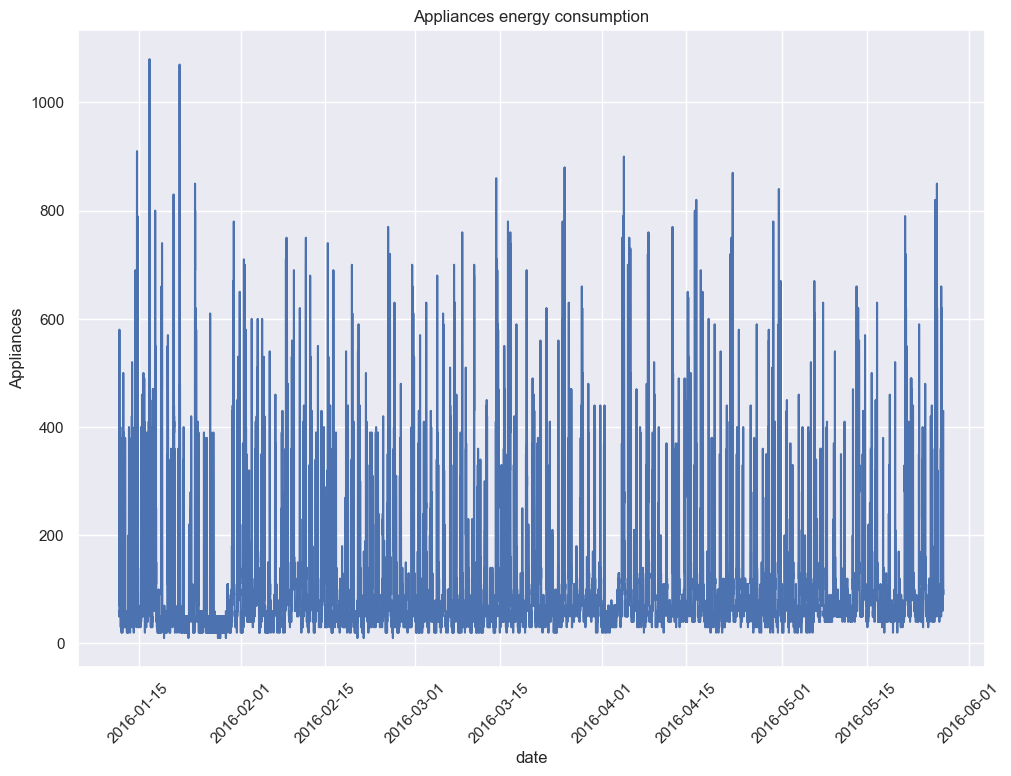

<Figure size 1170x827 with 0 Axes>

In [53]:
# Visualizing target with respect to date
sns.lineplot(x=df.index, y="Appliances", data=df)
plt.xticks(rotation = 45)
plt.title("Appliances energy consumption")
plt.show()
plt.clf()

Given that the target variable, appliance, [reading data is continuous](https://www.sciencedirect.com/science/article/pii/S266654682030009), a kdeplot was used to visualize the distribution.

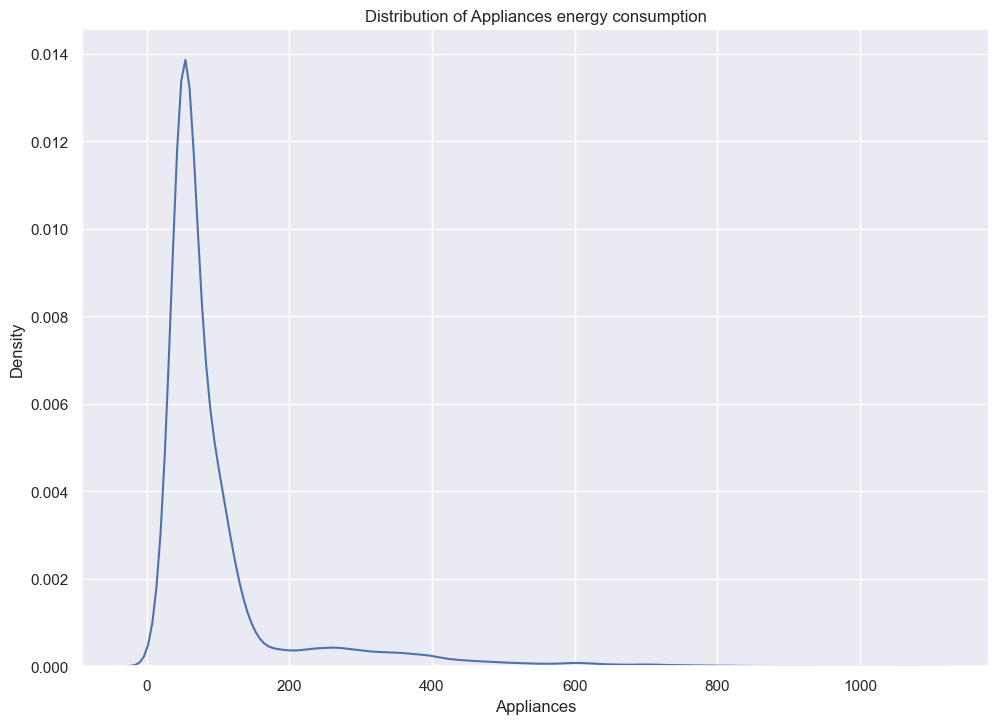

<Figure size 1170x827 with 0 Axes>

In [54]:
sns.kdeplot(data=df, x="Appliances")
plt.title("Distribution of Appliances energy consumption")
plt.show()
plt.clf()

The most common readings are within the ranges of 0 to ~ 200 Wh.

### Visualize Distributions

In [55]:
# Keep track of the numeric features to be used for the distributions later
num_feat = [feat for feat in df.columns if feat not in ('Dy_week', 'W_status')]

#### Numerical

In [56]:
# Show five number summary using df.describe()
df[num_feat].describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,nsm
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,19.592106,50.949283,7.910939,54.609083,20.267106,35.388200,22.029107,42.936165,19.485828,41.552401,7.412580,755.522602,79.750418,4.039752,38.330834,3.760995,42907.129465
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,1.844623,9.022034,6.090347,31.149806,2.109993,5.114208,1.956162,5.224361,2.014712,4.151497,5.318464,7.399441,14.901088,2.451221,11.794719,4.195248,24940.020831
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,15.330000,29.815000,-6.065000,1.000000,15.390000,23.200000,16.306667,29.600000,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.000000
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,18.277500,45.400000,3.626667,30.025000,18.700000,31.500000,20.790000,39.066667,18.000000,38.500000,3.670000,750.933333,70.333333,2.000000,29.000000,0.900000,21600.000000
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,19.390000,49.090000,7.300000,55.290000,20.033333,34.863333,22.100000,42.375000,19.390000,40.900000,6.920000,756.100000,83.666667,3.666667,40.000000,3.430000,43200.000000
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,20.619643,53.663333,11.256000,83.226667,21.600000,39.000000,23.390000,46.536000,20.600000,44.338095,10.400000,760.933333,91.666667,5.500000,40.000000,6.570000,64200.000000
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,25.795000,96.321667,28.290000,99.900000,26.000000,51.400000,27.230000,58.780000,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,85800.000000


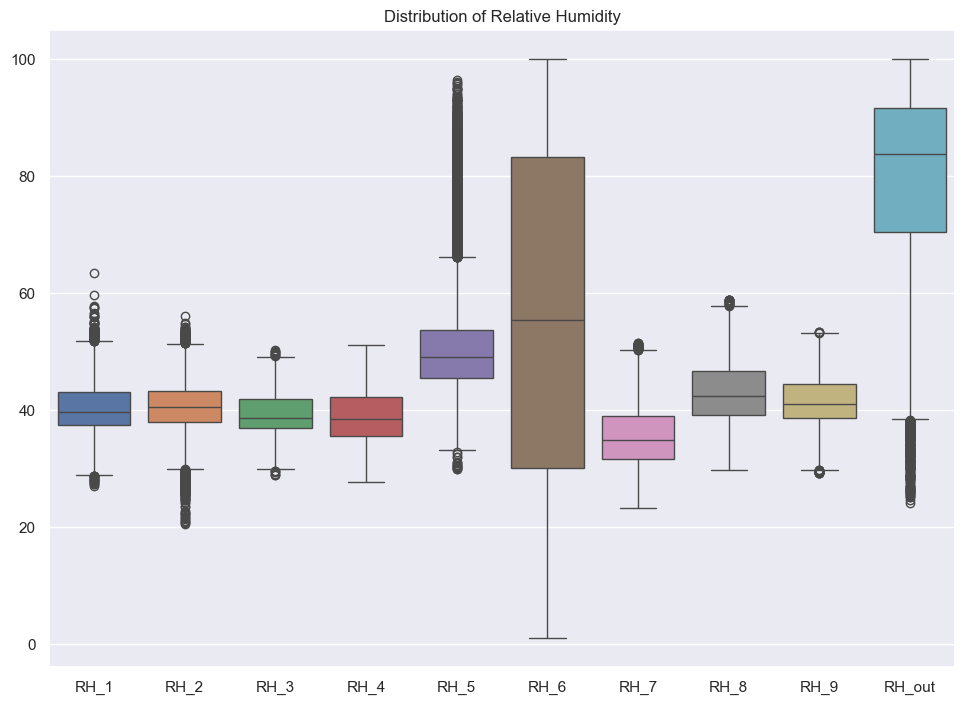

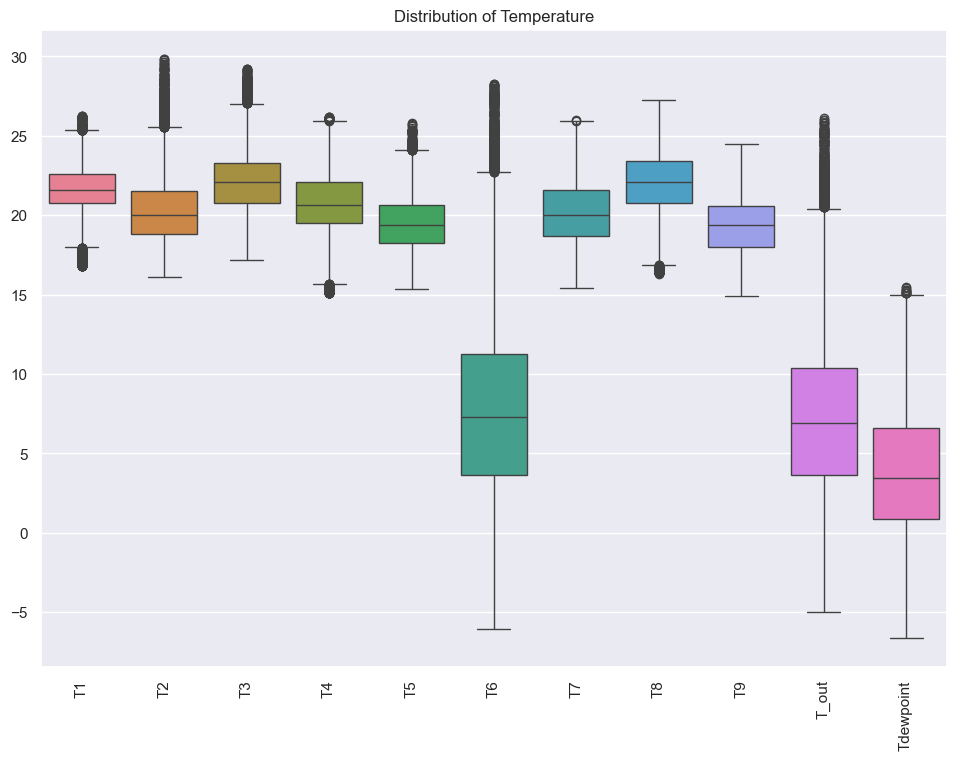

In [57]:
# Visualize Distributions with box-plots
sns.boxplot(data = df[[feat for feat in num_feat if feat[:2] == 'RH']])
plt.title("Distribution of Relative Humidity")
plt.show()

sns.boxplot(data = df[[feat for feat in num_feat if feat[:1] == 'T']])
plt.title("Distribution of Temperature")
plt.xticks(rotation = 90)
plt.show()


It can be observed that the distribution of the outdoor temperatures and humidity is wider than that of the temperature and humidity indoors. Moreover, The recorded temperature inside the house is higher that the outside while also having a lower humidity on average. However, it must be noted that RH_5 (humidity in the bathroom) have more outliers due to the nature of its use with respect to the humidity with the rest of the house. This may be important for our predictors later.

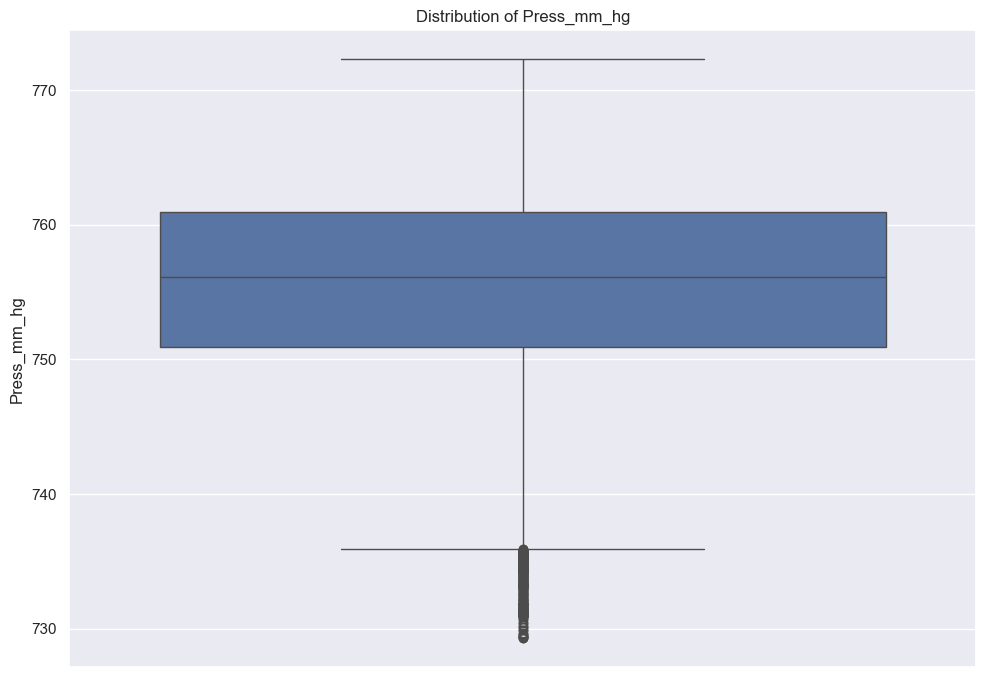

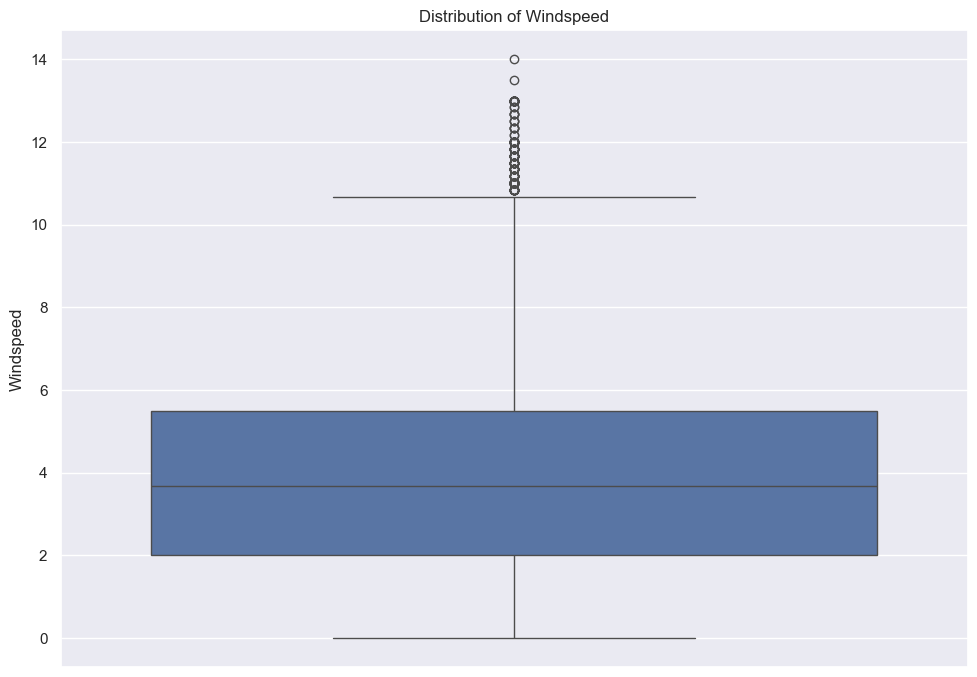

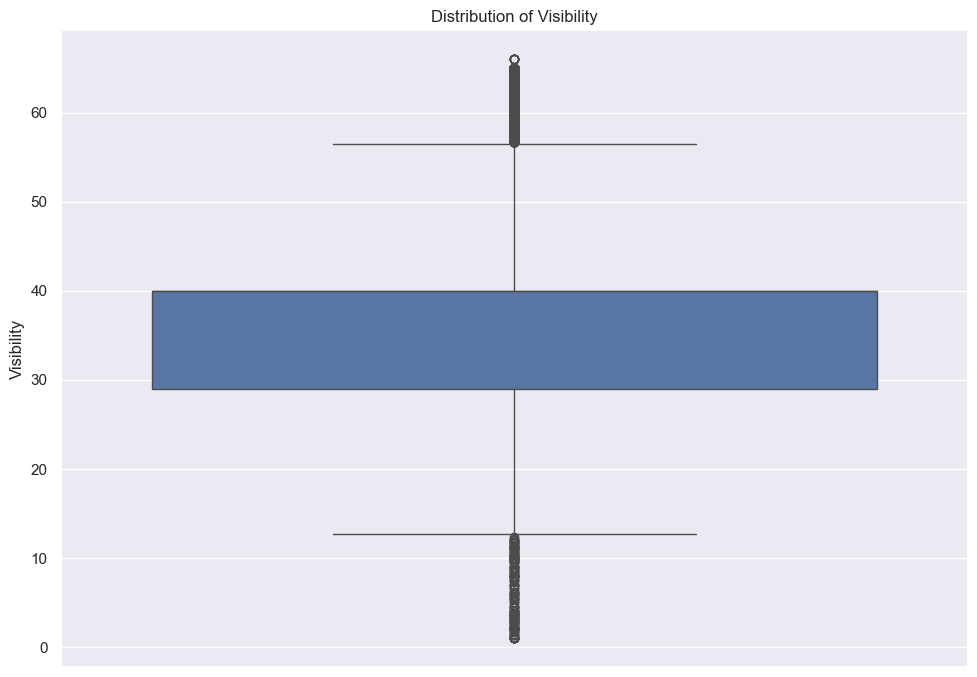

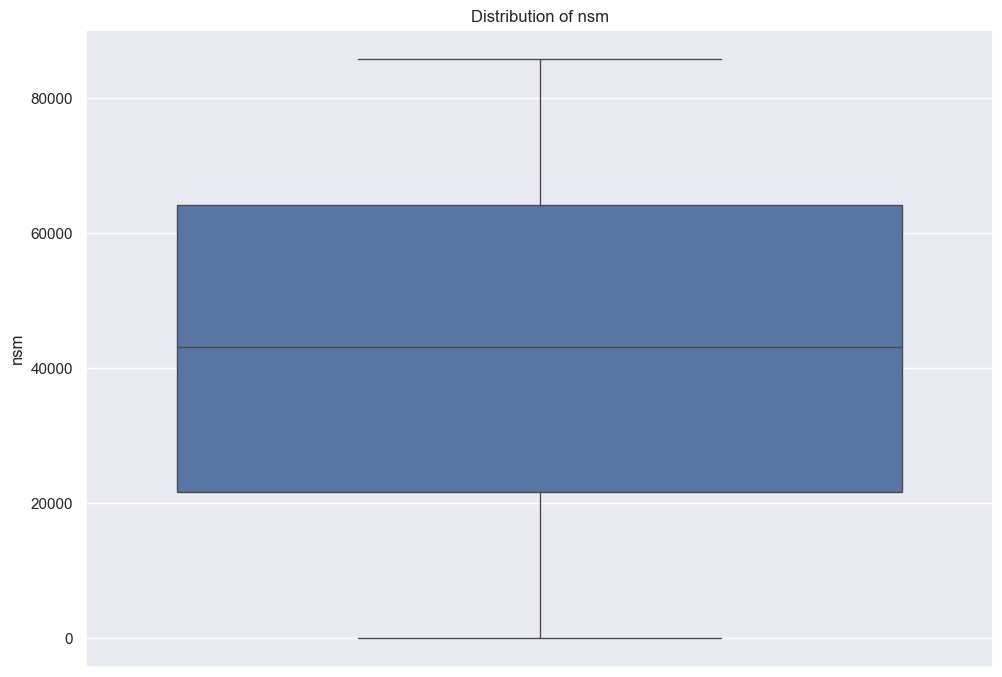

In [58]:
# Visualizing the rest of the numerical features
for feat in [feat for feat in num_feat if not(feat[:2] == 'RH' or feat[:1] == 'T')][2:]:
    sns.boxplot(data = df[feat])
    plt.title(f"Distribution of {feat}")
    plt.show()

Some important observations:
- nsm looks to be (approximately) distributed uniformly meaning enough representatives of times of days are recorded
- lights appear to be discrete which implies that the light usage are configured to certain specifications

In [59]:
# To confirm the nsm hypothesis above
df['nsm'].value_counts()

nsm
61200    138
62400    138
63000    138
63600    138
64200    138
        ... 
1800     137
1200     137
600      137
0        137
60600    137
Name: count, Length: 144, dtype: int64

#### Categorical

In [60]:
df[['Dy_week', 'W_status']].describe()

,Dy_week,W_status
count,19735,19735
unique,7,2
top,tues,weekday
freq,2880,14263


### Correlation Matrix

In [61]:
# Transform categorical data with OHE to make derive the correlation coefficient in place
def OHEdf(df, column_name):
    """Given a data frame and a column,
    append the dummy columns to df in place.
    Get rid of original column"""
    to_add = pd.get_dummies(df[column_name],prefix = column_name)
    df.drop(column_name, axis = 1, inplace = True)
    df = pd.concat([df,to_add], axis = 1)
    return df

In [62]:
df = OHEdf(df, 'W_status')
df = OHEdf(df, 'Dy_week')

In [63]:
# Checking to see if the categorical data was successfully transformed
df.head()
feat_names = df.columns

In [64]:
# View correlation of features with respect to target
df.corr()['Appliances'].sort_values(ascending=False)[1:]

nsm                 0.217152
lights              0.197278
T2                  0.120073
T6                  0.117638
T_out               0.099155
Windspeed           0.087122
RH_1                0.086031
T3                  0.085060
T1                  0.055447
Dy_week_mon         0.054307
T4                  0.040281
T8                  0.039572
RH_3                0.036292
Dy_week_sat         0.033463
Dy_week_fri         0.027731
T7                  0.025801
T5                  0.019760
W_status_weekend    0.017437
RH_4                0.016965
Tdewpoint           0.015357
T9                  0.010010
RH_5                0.006955
Visibility          0.000230
Dy_week_sun        -0.010875
W_status_weekday   -0.017437
Dy_week_thurs      -0.029276
Dy_week_wed        -0.031306
Press_mm_hg        -0.034885
Dy_week_tues       -0.042617
RH_9               -0.051462
RH_7               -0.055642
RH_2               -0.060465
RH_6               -0.083178
RH_8               -0.094039
RH_out        

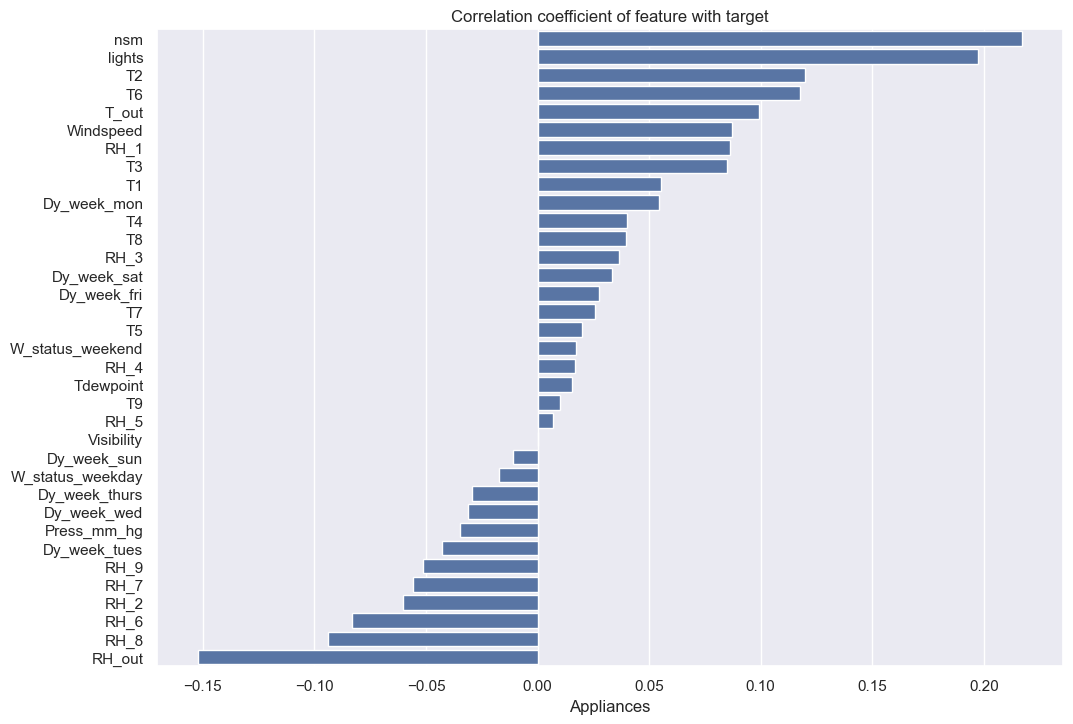

In [65]:
# See the thing above as a visualization
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(df.corr()['Appliances'].sort_values(ascending=False)[1:], orient='h')
plt.title('Correlation coefficient of feature with target')
plt.show()

It can be seen above that features `nsm`, `lights`,` T2`, `T6`, and `T_out` exhibit a somewhat positive correlation with the target variable Appliances, while `RH_out`, `RH_8` ,`RH_6` somewhat negative correlation with target variable Appliances

<Axes: >

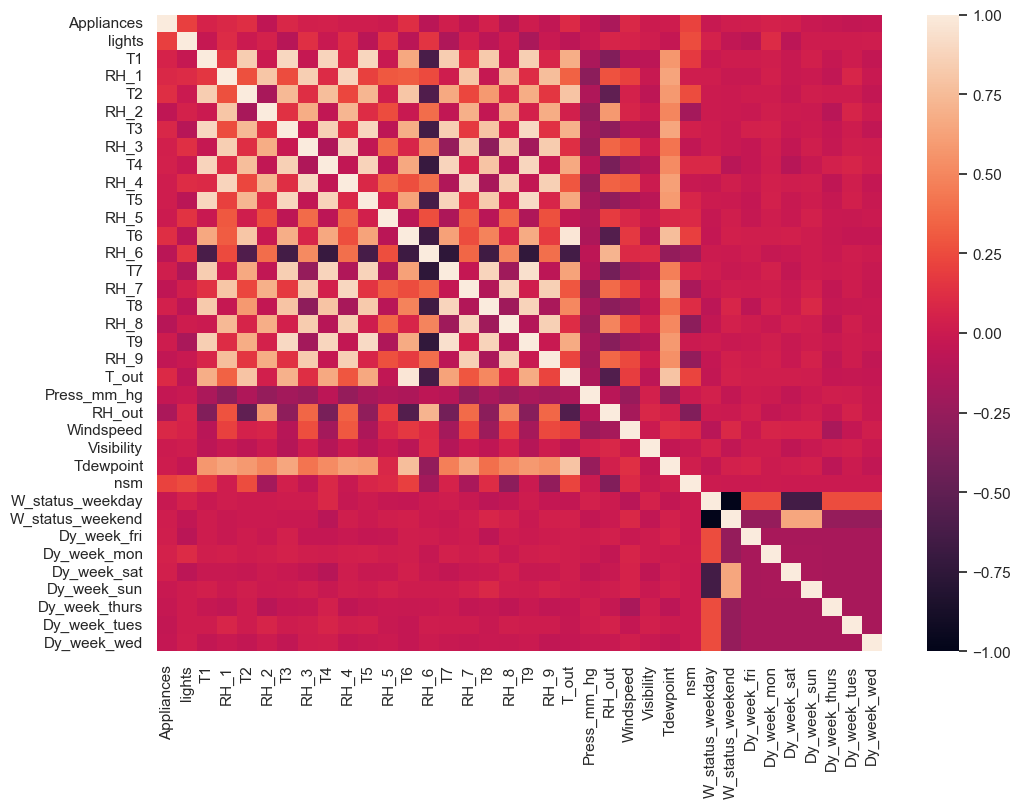

In [66]:
sns.heatmap(df.corr())

Based on the correlation heatmap above, it can be seen that some of the features are correlated with each other such as Tx since the temperature within the same household could suggest some codepenence with each other considering that _the rooms are in the same house_. This suggest that multilinear regression might not yield fruitful results. From this we can try using tree ensemble models namely Random Forest and Gradient Boosted Trees to [address multicollinearity](https://datascience.stackexchange.com/questions/31402/multicollinearity-in-decision-tree)[7]. Further studies will be done with Extreme Gradient Boosted Trees (XGBoost) as an aside.

# 3. Pre-process the data

While tree-based models [do not necessarily require you to normalize the data](https://towardsdatascience.com/do-decision-trees-need-feature-scaling-97809eaa60c6)[6], for the purpose of this paper, the data will be normalized in accoradance to Assignment 1B. To avoid data leakage, the data is first split and then normalized.


This paper is doing a 70-30 train-test split. Since this dataset is timeseries, we cannot use random train-test split.

In [25]:
# Split at the 70% observation. 
split_at = int(df.shape[0] * 0.7)
train = df.iloc[:split_at,:]
test = df.iloc[split_at:,:]

In [26]:
# last observation of train
max(train.index)

Timestamp('2016-04-16 15:10:00')

In [27]:
# first observation of test
min(test.index)

Timestamp('2016-04-16 15:20:00')

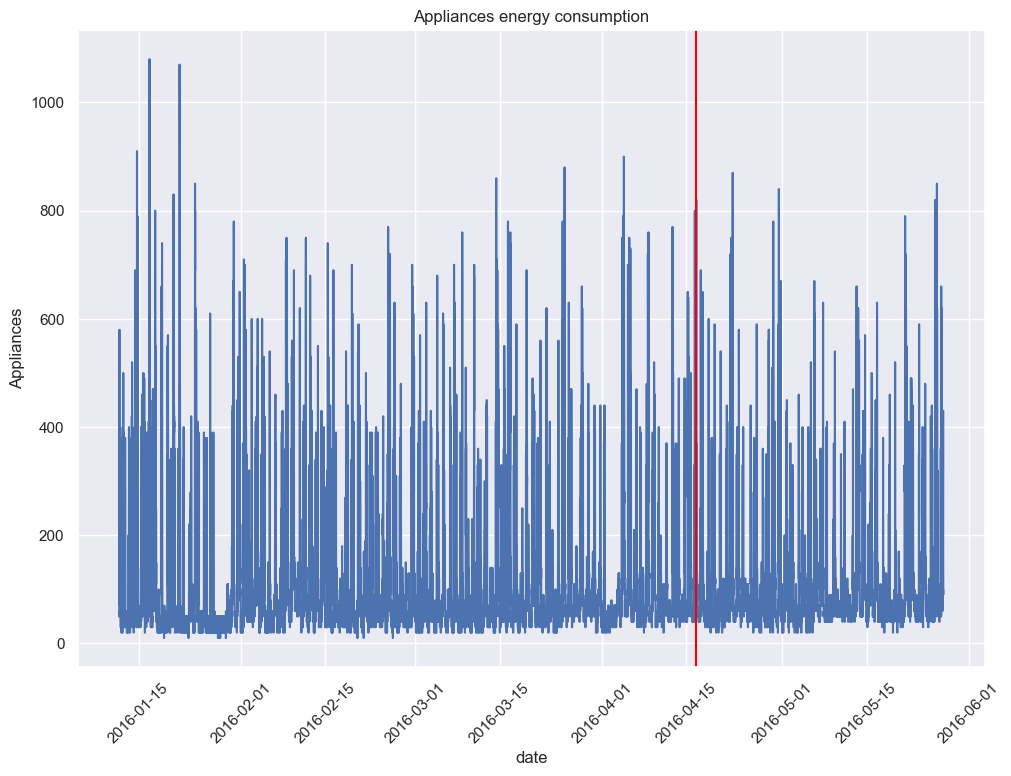

In [28]:
sns.lineplot(x=df.index, y="Appliances", data=df)
plt.xticks(rotation = 45)
plt.axvline(max(train.index), color='red')
plt.title("Appliances energy consumption")
plt.show()

Red line shows where the data is split. Everything to the left of the red line will be the train dataset and everything to the right is the test dataset (unseen data).

In [29]:
# Doing train-test-split 
X_train, y_train = train.iloc[:, 1:], train['Appliances']
X_test, y_test = test.iloc[:, 1:], test['Appliances']

In [30]:
from sklearn.preprocessing import MinMaxScaler

# scale X_train and X_test
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Implement, train and test prediction models

Before we implement the prediction models, the way cross-validation for time series will be explained. Instead of using normal cross-validation, which uses randomly generated samples form the datasro. TimeSeires Split will be used. 

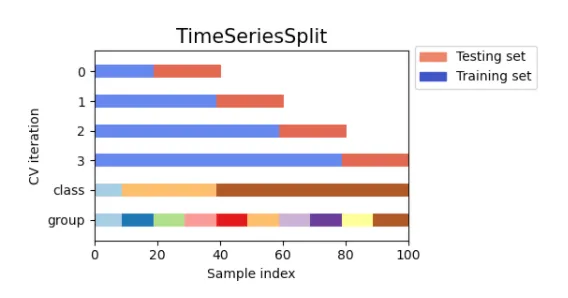

Given the CV randomly selects the data, to take advantage of the fact that the dataset is using time series data, TimeSeriesSplit is instead used. This emulates the nature of predicting future data with more recent data. In the image above, it can be seen how the training set gets more recent data (by increasing the size) to predict the more recent test data. 

In [31]:
from sklearn.model_selection import TimeSeriesSplit

# Define the TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=10) # default value is going to be 5

The metric to be used to compare the model will be RMSE for our regression tasks. RMSE will be used since it "quantifies the difference between the predicted and actual, taking the mean and finding the square root. This provides a clear undrestanding of the mode's accuracy."[9]

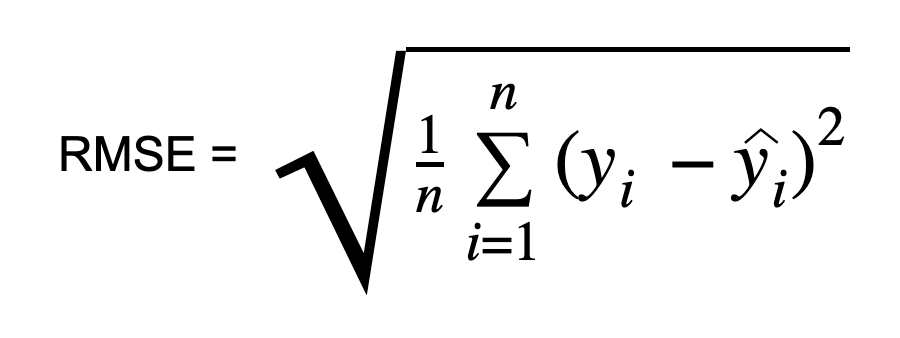

## Random Forest

In [40]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Initialize variables to store the best model and its performance
best_rf = None
best_rmse_rf = float('inf')  # Initialize with a large value

# Iterate over TimeSeriesSplit splits
# tscv is split by train and validation set
for train_index, val_index in tscv.split(X_train_scaled):
    X_train_ts, X_val = X_train_scaled[train_index], X_train_scaled[val_index]
    y_train_ts, y_val = y_train[train_index], y_train[val_index]

    # Initialize Random Forest Regressor
    rf_model = RandomForestRegressor()

    # Fit the Random Forest model
    rf_model.fit(X_train_ts, y_train_ts)

    # Make predictions on the test set
    y_pred = rf_model.predict(X_val)

    # Calculate Mean Squared Error
    rmse = mean_squared_error(y_val, y_pred) ** 0.5

    # Check if the current model is the best so far
    if rmse < best_rmse_rf:
        best_rmse_rf = rmse
        best_rf = rf_model

print("Best Model Parameters:")
print(best_rf.get_params())

print("Best RMSE: ")
print(best_rmse_rf)

/var/folders/gg/27ydp9614p9cpq8pg5r7rklc0000gn/T/ipykernel_20460/2989924891.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train_ts, y_val = y_train[train_index], y_train[val_index]


/var/folders/gg/27ydp9614p9cpq8pg5r7rklc0000gn/T/ipykernel_20460/2989924891.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train_ts, y_val = y_train[train_index], y_train[val_index]
/var/folders/gg/27ydp9614p9cpq8pg5r7rklc0000gn/T/ipykernel_20460/2989924891.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train_ts, y_val = y_train[train_index], y_train[val_index]
/var/folders/gg/27ydp9614p9cpq8pg5r7rklc0000gn/T/ipykernel_20460/2989924891.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with D

Best Model Parameters:
{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
Best RMSE: 
95.7070636466949


In [41]:
y_pred = best_rf.predict(X_test)
mean_squared_error(y_test, y_pred) ** 0.5

/Users/nic/anaconda3/envs/CS7306/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


112.6415044761637

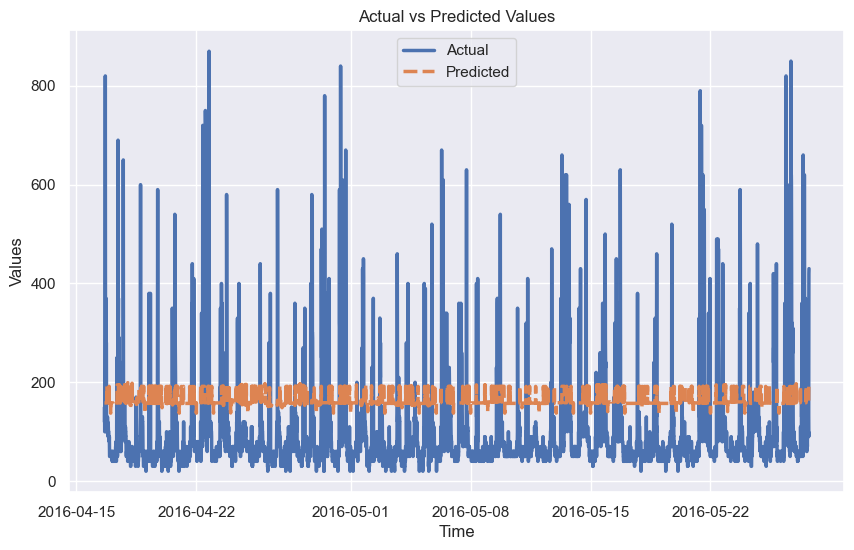

In [34]:
# Create a DataFrame for visualization
data = {'Actual': y_test, 'Predicted': y_pred}
df = pd.DataFrame(data)

# Plot the line plot using Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, linewidth=2.5)

# Add labels and title
plt.xlabel('Time')
plt.ylabel('Values')
plt.title('Actual vs Predicted Values')

# Show the plot
plt.show()

## Gradient Boosted Trees

In [70]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize variables to store the best model and its performance
best_gb = None
best_rmse_gb = float('inf')  # Initialize with a large value

# Iterate over TimeSeriesSplit splits
# tscv is split by train and validation set
for train_index, val_index in tscv.split(X_train_scaled):
    X_train_ts, X_val = X_train_scaled[train_index], X_train_scaled[val_index]
    y_train_ts, y_val = y_train[train_index], y_train[val_index]

    # Initialize Gradient Boosted Regressor
    gb_model = GradientBoostingRegressor()

    # Fit the Random Forest model
    gb_model.fit(X_train_ts, y_train_ts)

    # Make predictions on the test set
    y_pred = gb_model.predict(X_val)

    # Calculate Mean Squared Error
    rmse = mean_squared_error(y_val, y_pred) ** 0.5

    # Check if the current model is the best so far
    if rmse < best_rmse_gb:
        best_rmse_gb = rmse
        best_gb = gb_model

print("Best Model Parameters:")
print(best_gb.get_params())

print("Best RMSE: ")
print(best_rmse_gb)

/var/folders/gg/27ydp9614p9cpq8pg5r7rklc0000gn/T/ipykernel_20460/411201173.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train_ts, y_val = y_train[train_index], y_train[val_index]


/var/folders/gg/27ydp9614p9cpq8pg5r7rklc0000gn/T/ipykernel_20460/411201173.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train_ts, y_val = y_train[train_index], y_train[val_index]
/var/folders/gg/27ydp9614p9cpq8pg5r7rklc0000gn/T/ipykernel_20460/411201173.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train_ts, y_val = y_train[train_index], y_train[val_index]
/var/folders/gg/27ydp9614p9cpq8pg5r7rklc0000gn/T/ipykernel_20460/411201173.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with Data

Best Model Parameters:
{'alpha': 0.9, 'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'squared_error', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_change': None, 'random_state': None, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}
Best RMSE: 
91.19740771273925


275.21755897399686


/Users/nic/anaconda3/envs/CS7306/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  warnings.warn(


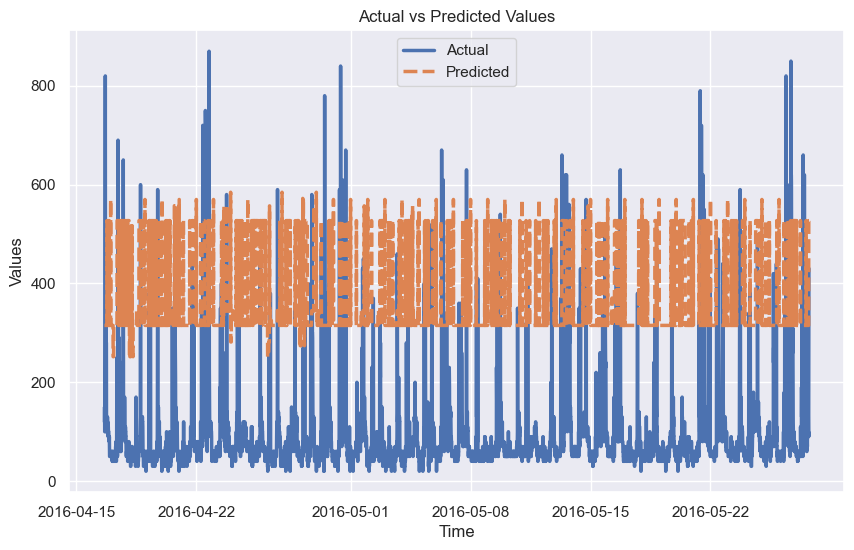

In [36]:
y_pred = best_gb.predict(X_test)
print(mean_squared_error(y_test, y_pred) ** 0.5)

# Create a DataFrame for visualization
data = {'Actual': y_test, 'Predicted': y_pred}
df = pd.DataFrame(data)

# Plot the line plot using Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, linewidth=2.5)

# Add labels and title
plt.xlabel('Time')
plt.ylabel('Values')
plt.title('Actual vs Predicted Values')

# Show the plot
plt.show()

In [37]:
df.columns

Index(['Actual', 'Predicted'], dtype='object')

/var/folders/gg/27ydp9614p9cpq8pg5r7rklc0000gn/T/ipykernel_20460/1339455999.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')


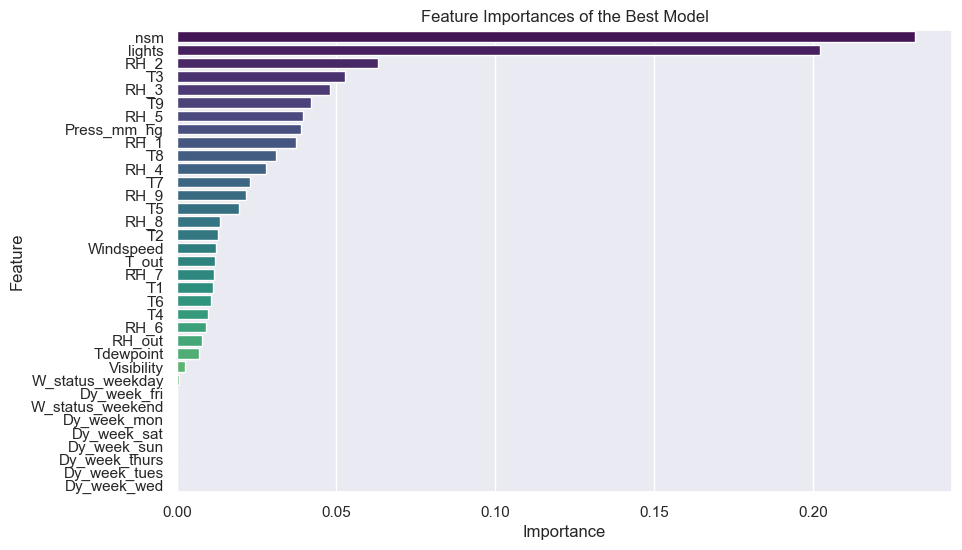

In [38]:
feature_importances = best_gb.feature_importances_
feature_names = feat_names[1:]

feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)



plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importances of the Best Model')
plt.show()

## XGBoost

In [ ]:
#!pip install xgboost

In [77]:
from xgboost import XGBRegressor

# Initialize variables to store the best model and its performance
best_xgb = None
best_rmse_xgb = float('inf')  # Initialize with a large value

# Iterate over TimeSeriesSplit splits
# tscv is split by train and validation set
for train_index, val_index in tscv.split(X_train_scaled):
    X_train_ts, X_val = X_train_scaled[train_index], X_train_scaled[val_index]
    y_train_ts, y_val = y_train[train_index], y_train[val_index]

    # Initialize Random Forest Regressor
    xgb_model = XGBRegressor()

    # Fit the Random Forest model
    xgb_model.fit(X_train_ts, y_train_ts)

    # Make predictions on the test set
    y_pred = xgb_model.predict(X_val)

    # Calculate Mean Squared Error
    rmse = mean_squared_error(y_val, y_pred) ** 0.5

    # Check if the current model is the best so far
    if rmse < best_rmse_gb:
        best_rmse_xgb = rmse
        best_xgb = xgb_model

print("Best Model Parameters:")
print(best_xgb.get_params())

print("Best RMSE: ")
print(best_rmse_xgb)

/var/folders/gg/27ydp9614p9cpq8pg5r7rklc0000gn/T/ipykernel_20460/1014947284.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train_ts, y_val = y_train[train_index], y_train[val_index]
/var/folders/gg/27ydp9614p9cpq8pg5r7rklc0000gn/T/ipykernel_20460/1014947284.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train_ts, y_val = y_train[train_index], y_train[val_index]
/var/folders/gg/27ydp9614p9cpq8pg5r7rklc0000gn/T/ipykernel_20460/1014947284.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with D

/var/folders/gg/27ydp9614p9cpq8pg5r7rklc0000gn/T/ipykernel_20460/1014947284.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train_ts, y_val = y_train[train_index], y_train[val_index]
/var/folders/gg/27ydp9614p9cpq8pg5r7rklc0000gn/T/ipykernel_20460/1014947284.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train_ts, y_val = y_train[train_index], y_train[val_index]
/var/folders/gg/27ydp9614p9cpq8pg5r7rklc0000gn/T/ipykernel_20460/1014947284.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with D

Best Model Parameters:


AttributeError: 'NoneType' object has no attribute 'get_params'

In [76]:
xgb_model.fit(X_train_ts, y_train_ts)

y_pred = xgb_model.predict(X_val)

# Calculate Mean Squared Error
rmse = mean_squared_error(y_val, y_pred) ** 0.5
rmse

xgb_model.get_params()

{'objective': 'reg:squarederror',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

# 5. Compare the results from all candidate models, choose the best model, justify your choice and discuss the results

In [ ]:
# XGBoost

# 6. Reflect on what you have learned by completing this assignment and how to improve the models

# 7. References

1. Cardeno Paper
2. https://machinelearningmastery.com/why-one-hot-encode-data-in-machine-learning/
3. https://pandas.pydata.org/docs/user_guide/timeseries.html
4. https://www.sciencedirect.com/science/article/pii/S2666546820300094
5. https://seaborn.pydata.org/generated/seaborn.kdeplot.html
6. https://towardsdatascience.com/do-decision-trees-need-feature-scaling-97809eaa60c6
7. https://datascience.stackexchange.com/questions/31402/multicollinearity-in-decision-tree
8. https://www.analyticsvidhya.com/blog/2021/10/evaluation-metric-for-regression-models/